In [1]:
import requests
import os
from IPython.display import JSON
import pandas as pd
import numpy as np
import time

from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import kaleido

import panel as pn
pn.extension()
import param
import hvplot.pandas

import pickle
from io import StringIO

In [2]:
with open('Transcripts/Dolly_Parton_Bobbie_Wygant.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
audio_url = "https://github.com/CharlesPizza/AudioAnalysisDollyParton/blob/main/Audio/Dolly%20Parton%20Interview%201977%20-%20Bobbie%20Wygant%20Archive.mp3?raw=true"
audio_play = pn.pane.Audio(audio_url, name="Audio", time=360)
audio_play

Audio(str, time=360)

In [4]:
JSON(data)

<IPython.core.display.JSON object>

In [5]:
sentiment = data['sentiment_analysis_results']
sentiment_df = pd.DataFrame(sentiment)
sentiment_df['speaker'] = sentiment_df['speaker'].map(lambda x: ['Dolly' if x == 'B' else 'Interviewer']).explode('speaker')

In [7]:
sentiment_df.drop([0,1,2,3],inplace=True)
sentiment_df.drop(range(57, 74), inplace=True)
sentiment_df.head()

,text,start,end,sentiment,confidence,speaker
4,"Dolly, do you see a time when your country mus...",39187,44017,NEUTRAL,0.635923,Interviewer
5,"Oh, I don't think so.",44140,45292,NEUTRAL,0.570746,Dolly
6,I think I'm far too country for my country mus...,45340,49747,NEGATIVE,0.661745,Dolly
7,"But this past year, I've been trying to do som...",49780,55342,NEUTRAL,0.534959,Dolly
8,But I guess I'll be writing country songs as l...,55465,65497,POSITIVE,0.868489,Dolly


In [11]:
_df = pd.DataFrame()
_df['count'] = sentiment_df.groupby(['speaker', 'sentiment'])['sentiment'].count()
plot = _df.hvplot(title="Sentiment Analysis by Speaker", kind="bar")

In [12]:
positive_df = sentiment_df.query('sentiment == "POSITIVE"')[["text","sentiment",'speaker']]
negative_df = sentiment_df.query('sentiment == "NEGATIVE"')[['text','sentiment','speaker']]
neutral_df = sentiment_df.query('sentiment == "NEUTRAL"')[['text','sentiment','speaker']]

sentiment_tabs = pn.Tabs(('Sentiment Overview', plot),
                         ('Positive', pn.widgets.DataFrame(positive_df, autosize_mode='fit_columns', width=700, height=300)),
                         ('Negative', pn.widgets.DataFrame(negative_df, autosize_mode='fit_columns', width=700, height=300)),
                         ('Neutral', pn.widgets.DataFrame(neutral_df, autosize_mode='fit_columns', width=700, height=300))
                        )
sentiment_tabs

Tabs
    [0] HoloViews(Bars, name='Sentiment Overview')
    [1] DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=                          ..., width=700)
    [2] DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=                          ..., width=700)
    [3] DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=                          ..., width=700)

In [14]:
speaker_text = sentiment_df.groupby('speaker')['text'].apply(' '.join).map(lambda x: x.lower())

C:\Users\Charles\AppData\Local\Temp\ipykernel_17780\794974448.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


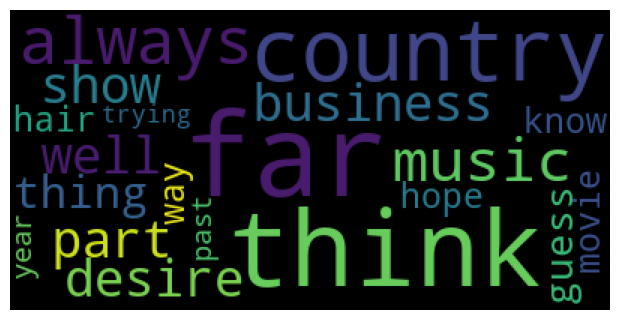

In [16]:
stopwords = set(STOPWORDS)
wordcloud_dolly = WordCloud(background_color = "black", stopwords = stopwords, max_words=20, 
                      colormap = 'viridis', collocations=False).generate(speaker_text['Dolly'])
fig = plt.figure(figsize=(6,3), dpi=100)
ax = plt.axes([0,0,1,1])
plt.imshow(wordcloud_dolly)
plt.axis('off')
fig.tight_layout()
plt.show()